The dataset was downloaded from https://raw.githubusercontent.com/lutzhamel/fake-news/master/data/fake_or_real_news.csv
The data is divided into the columns [id, title, text, label].
In the label column the items are labeled as fake or real, which allows the detection.

IMPORTS


In [128]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
import matplotlib.pyplot as plt

In [129]:
df = pd.read_csv("https://raw.githubusercontent.com/lutzhamel/fake-news/master/data/fake_or_real_news.csv")

Inspecting dataframe

In [130]:
df.describe()

,id
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [131]:
df.head()

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


Converting label to binary

In [132]:
df['T/F_news'] = df['label'].apply(lambda x: 0 if x == "FAKE" else 1)

In [133]:
df['T/F_news'].value_counts()

1    3171
0    3164
Name: T/F_news, dtype: int64

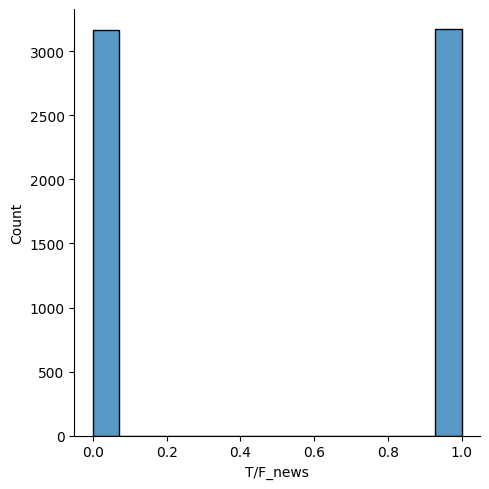

In [134]:
sns.displot(data=df, x='T/F_news',legend=True) #dispot of data range
plt.show()

Assigning X, y to text and T/F_news column

In [135]:
X, y = df['text'], df['T/F_news']

Scaling X (skipping Y as it's binary data no sense in vectorizing)

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15, random_state=0)

In [137]:
vectorizer = TfidfVectorizer(stop_words="english", max_df=0.8)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [138]:
#creating function for taking sample news from set
def check_sample_article(var: int):
    with open("txt1.txt", "w", encoding="utf-8") as f:
        f.write(X_test.iloc[var])
    with open("txt1.txt", "r", encoding="utf-8") as f:
        txt = f.read()
        #vectorizing list and its type take first argument 1= T, 0 = F
        if model.predict(vectorizer.transform([txt]))[0] == 1:
            return "Real News"
        return "Fake News!"

#creating function for calling the models as it is repetitive
def model_selector(model_type):
    global model # using global, as predicting y_pred variable outside the function
    model = model_type
    model.fit(X_train_vectorized, y_train)
    return model.score(X_test_vectorized,y_test)


In [139]:
model_selector(LinearSVC(random_state=0))

0.9327024185068349

In [140]:
pd.DataFrame(confusion_matrix(y_test, model.predict(X_test_vectorized)))

,0,1
0,429,34
1,30,458


In [141]:
model_selector(LogisticRegression(random_state=0))

0.9158780231335436

In [142]:
pd.DataFrame(confusion_matrix(y_test, model.predict(X_test_vectorized)))

,0,1
0,426,37
1,43,445


In [143]:
model_selector(RandomForestClassifier(random_state=0))


0.9064143007360673

In [144]:
pd.DataFrame(confusion_matrix(y_test, model.predict(X_test_vectorized)))

,0,1
0,413,50
1,39,449


In [145]:
check_sample_article(41)

'Real News'

In [146]:
df.iloc[41]

id                                                        431
title       First Take: Wall Street bids goodbye to June hike
text        NEW YORK -- Bye bye June rate hike. That was t...
label                                                    REAL
T/F_news                                                    1
Name: 41, dtype: object

Conclusions

In the fake news detection project the following supervised ML methods: LinearSVC, Logistic Regression, Random Forest Classifier The model accuracy was the following for each method, accordingly.

LinearSVC score => 0.9327; 

	confusion matrix
		0	1
	0	429	34
	1	30	458

Logistic Regression score => 0.9158; 

	confusion matrix
		0	1
	0	426	37
	1	43	445

Random Forest Classifier score => 0.9064; 

	confusion matrix
    	0	1
	0	413	50
	1	39	449


The most suitable division into a training set and a test set is the proportion of 75% - 15%. Other combinations of parameters may increase the model accuracy, but with the cost of increased number of mistakes made in the confusion matrix.
As a result, usage of LinearSVC model resulted the most efficient among the others with the smaller margin of error.